<a href="https://colab.research.google.com/github/IsmailHuseynov/Alzheimer-s_detection/blob/main/Alzheimer's_detection_Deep_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To access your dataset in **Google Drive** from **Google Colab**, you need to mount your **Google Drive** as follows:

In [69]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This will prompt you to authorize **Google Colab** to access your **Google Drive**, and once you do that, you will be able to access your **Google Drive** files from **Google Colab**. After mounting your drive, you can navigate to the directory where your dataset is saved:

In [70]:
# Set the path to your dataset directory
data_dir = '/content/drive/MyDrive/dataset'



The **Python** `os` library is used to list the files in a directory. 
 `os.listdir()` and `os.walk` are methods of the `os` library to get the name of each file and folder in a directory. `os.listdir()` method lists files and folders in a given directory. But, this method does not return anything within subfolders (subdirectories)(!)

Since we have 4 subfolders in a given directory, `os.listdir()` function will return us only the names of those subfolders, not the file names within each subfolder:

In [71]:
# import os module
import os

subfolders = os.listdir(data_dir)

for file in subfolders:
    print(file)
print(f"Number of subfolders: {len(subfolders)}")

Very_Mild_Demented
Mild_Demented
Non_Demented
Moderate_Demented
Number of subfolders: 4


Unlike `os.listdir()`, `os.walk()` function returns a list of every files in an entire file tree. `os.walk()` returns the name of every subfolder in a directory and any of its subdirectories. 

`os.walk()` generates a 3-tuple (`root`, `dirs`, `files`) for each subdirectory in a directory tree, allowing you to recursively iterate through all the files and subdirectories in a directory and get information about each one:

* `root`: prints out *directories* from what you specified;
* `dirs`: prints out *sub-directories (subfolders)* from `root`;
* `files`: prints out all *files* from `root` and `dirs`.

In [72]:
all_files = os.walk(data_dir)

for root, dirs, files in all_files:
    print(f"root: {root}")
    print(f"directories: {dirs}")
    print(f"files: {files}")

root: /content/drive/MyDrive/dataset
directories: ['Very_Mild_Demented', 'Mild_Demented', 'Non_Demented', 'Moderate_Demented']
files: []
root: /content/drive/MyDrive/dataset/Very_Mild_Demented
directories: []
files: ['verymild_2107.jpg', 'verymild_211.jpg', 'verymild_2115.jpg', 'verymild_2098.jpg', 'verymild_2124.jpg', 'verymild_2122.jpg', 'verymild_2134.jpg', 'verymild_2123.jpg', 'verymild_2137.jpg', 'verymild_2130.jpg', 'verymild_2139.jpg', 'verymild_2131.jpg', 'verymild_2125.jpg', 'verymild_2127.jpg', 'verymild_2118.jpg', 'verymild_2126.jpg', 'verymild_2133.jpg', 'verymild_2128.jpg', 'verymild_2135.jpg', 'verymild_213.jpg', 'verymild_2129.jpg', 'verymild_2120.jpg', 'verymild_2138.jpg', 'verymild_2136.jpg', 'verymild_2132.jpg', 'verymild_212.jpg', 'verymild_2121.jpg', 'verymild_2119.jpg', 'verymild_2154.jpg', 'verymild_2148.jpg', 'verymild_2140.jpg', 'verymild_2156.jpg', 'verymild_2143.jpg', 'verymild_2145.jpg', 'verymild_2155.jpg', 'verymild_2150.jpg', 'verymild_2158.jpg', 'verymild

Then, you need to create an empty list `image_files` to hold all image file names. You can use `os.walk()` to recursively iterate through each subfolder and get a list of all image file names. For each file, you can check if it ends with the file extension of your image files (e.g. `.jpg` or `.png`) and if it does, we append the full file path to the `image_files` list using `os.path.join(root, file)`.



In [73]:
# Create an empty list to hold all image file names
image_files = []

# Recursively iterate through each subfolder and get a list of all image file names
for root, directories, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.jpg'):   # Change the file extension to match your images
            image_files.append(os.path.join(root, file))

Finally, you can print the number of files in the list of `image_files`:

In [74]:
# Print the number of files in the list
print(f"The number of image files: {len(image_files)}")

The number of image files: 6400


# Image Preprocessing

The following script loads and preprocesses a set of images for use in a machine learning algorithm, making the data easier to work with and improving model performance:

* `cv2` is a popular **Computer Vision** library that provides a wide range of functions for working with *images* and *videos*;
* `numpy` is a library that provides support for working with *arrays* and *matrices*;
* Create two empty lists called `X` and `y` to store the preprocessed images and their corresponding labels.

Then the following loop goes through a set of image files, reads each image using `cv2.imread()`, converts it from the `BGR` color space to the `RGB` color space using `cv2.cvtColor()`, normalizes the pixel values so that they are between 0 and 1 by dividing by 255.0, and stores the resulting image in the `X` list.

Meanwhile, the label for each image is extracted from the subfolder name by splitting the file path on the `'/'` character and taking the second-to-last element (since the last element is the image filename itself). This label is then stored in the `y` list.

Last two lines convert the `X` and `y` lists to `numpy` arrays, which makes them easier to work with in many Machine Learning algorithms. The resulting arrays can be used as input data and labels for training a model.


In [8]:
# import essential libraries
import cv2
import numpy as np


# Load and preprocess the images
X = []
y = []

for file in image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    img = img.astype('float32') / 255.0  # normalize pixel values to [0,1]
    X.append(img)
    label = file.split('/')[-2]  # get the label from the subfolder name
    y.append(label)

# Convert the lists to arrays
X = np.array(X)
y = np.array(y)



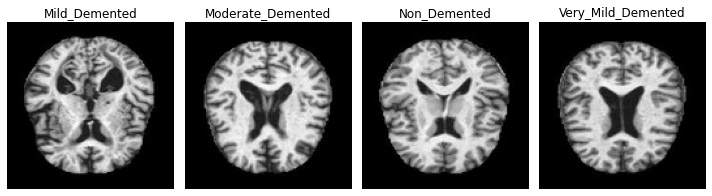

In [68]:
import random

# Get a list of unique class labels
classes = np.unique(y)

# Create a dictionary to hold the selected images for each class
selected_images = {}

# Iterate through each class and select 4 random images
for label in classes:
    class_images = X[y == label]
    selected = random.sample(list(class_images), 4)
    selected_images[label] = selected

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(10,10))
for i in range(4):
   axs[i].imshow(selected_images[classes[i]][0])
   axs[i].set_title(classes[i])
   axs[i].axis("off")

plt.tight_layout()
plt.show()

# Dataset Splitting

To split the dataset of preprocessed images into *training*, *validation*, and *testing* sets, you can use the `train_test_split` function from the `scikit-learn` library, as follows.

The split ensures that the model is trained on a subset of the data, validated on another subset to tune hyperparameters, and tested on a final subset to evaluate performance, all while avoiding overfitting to any one set of images.

In [75]:
# Split the dataset into training, validation, and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)



# Print the shape of each set
print('Training set shape:', X_train.shape, y_train.shape)
print('Validation set shape:', X_valid.shape, y_valid.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (5120, 128, 128, 3) (5120,)
Validation set shape: (640, 128, 128, 3) (640,)
Testing set shape: (640, 128, 128, 3) (640,)


From the above result, `y_train` has shape `(5120,)`. This suggests that the training dataset contains 5120 images and `y_train` contains the corresponding target labels for each image. The fact that `y_train` is a one-dimensional array indicates that it is a vector rather than a matrix. However, we have 4 different classes for the target variable, namely:

`['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']`

 Therefore, the shape of `y_train` should be `(5120,4)`. This is a common issue in Machine Learning problems where we need to handle multi-class classification tasks.

To fix this issue, we will use *one-hot encoding*, which is a popular technique in multi-class classification problems. *One-hot encoding* involves converting the categorical target variable into a binary vector representation. In our case, we have 4 classes, so the one-hot encoded vector for each image will have 4 elements, with a value of 1 in the position corresponding to the correct class and 0s in all other positions.

To apply *one-hot encoding*, we will use the following script:

In [76]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform them
y_train = label_encoder.fit_transform(y_train)

# Transform the validation labels
y_valid = label_encoder.transform(y_valid)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes=4)
y_valid = to_categorical(y_valid, num_classes=4)


In [77]:
# Print the shape of training and validation labels
print(f"Training set shape: {y_train.shape}")
print(f"Validation set shape: {y_valid.shape}")

Training set shape: (5120, 4)
Validation set shape: (640, 4)


In [78]:
# import essential layers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense


img_height = 128
img_width = 128

# Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(filters=16, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer="he_normal", input_shape = (img_height, img_width, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model.add(MaxPooling2D())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [79]:
from tensorflow.keras.callbacks import  ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(filepath = 'model_kaggle_alzheimer.h5',
                                                save_weights_only = False,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only = True)
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), callbacks = [model_checkpoint_callback], epochs = 50)

Epoch 1/50
160/160 [==============================] - 53s 326ms/step - loss: 1.0094 - accuracy: 0.5406 - val_loss: 0.8048 - val_accuracy: 0.6234
Epoch 2/50
160/160 [==============================] - 52s 324ms/step - loss: 0.6582 - accuracy: 0.7191 - val_loss: 0.5683 - val_accuracy: 0.7641
Epoch 3/50
160/160 [==============================] - 52s 324ms/step - loss: 0.4070 - accuracy: 0.8412 - val_loss: 0.3143 - val_accuracy: 0.8828
Epoch 4/50
160/160 [==============================] - 52s 325ms/step - loss: 0.2433 - accuracy: 0.9127 - val_loss: 0.2256 - val_accuracy: 0.9062
Epoch 5/50
160/160 [==============================] - 52s 323ms/step - loss: 0.1937 - accuracy: 0.9268 - val_loss: 0.2348 - val_accuracy: 0.8969
Epoch 6/50
160/160 [==============================] - 52s 323ms/step - loss: 0.1401 - accuracy: 0.9445 - val_loss: 0.2129 - val_accuracy: 0.9156
Epoch 7/50
160/160 [==============================] - 51s 321ms/step - loss: 0.1035 - accuracy: 0.9621 - val_loss: 0.2813 - val_ac

In [ ]:
model = tf.keras.models.load_model('model_kaggle_alzheimer.h5')

In [ ]:
loss, accuracy = model.evaluate(X_valid, y_valid)


20/20 [==============================] - 3s 131ms/step - loss: 0.0541 - accuracy: 0.9828


In [ ]:
# Import the accuracy score function
from sklearn.metrics import accuracy_score

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Calculate the accuracy
acc = accuracy_score(y_true, y_pred_classes)

print('Accuracy:', acc)

20/20 [==============================] - 3s 135ms/step
Accuracy: 0.9828125


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print(confusion_mtx)


20/20 [==============================] - 5s 228ms/step
[[ 87   0   0   0]
 [  0   4   0   0]
 [  0   0 312   4]
 [  1   0   6 226]]


In [ ]:
from sklearn.metrics import classification_report


# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Get the classification report
class_report = classification_report(y_true, y_pred_classes, target_names = class_names)

# Print the classification report
print(class_report)

20/20 [==============================] - 5s 239ms/step
                    precision    recall  f1-score   support

     Mild_Demented       0.99      1.00      0.99        87
 Moderate_Demented       1.00      1.00      1.00         4
      Non_Demented       0.98      0.99      0.98       316
Very_Mild_Demented       0.98      0.97      0.98       233

          accuracy                           0.98       640
         macro avg       0.99      0.99      0.99       640
      weighted avg       0.98      0.98      0.98       640



20/20 [==============================] - 3s 142ms/step


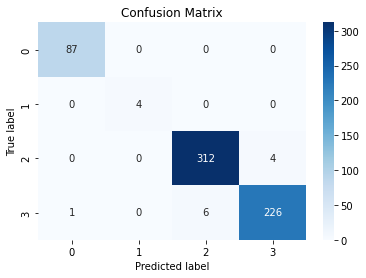

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)


# Plot the heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')#"YlGnBu")

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


20/20 [==============================] - 7s 333ms/step


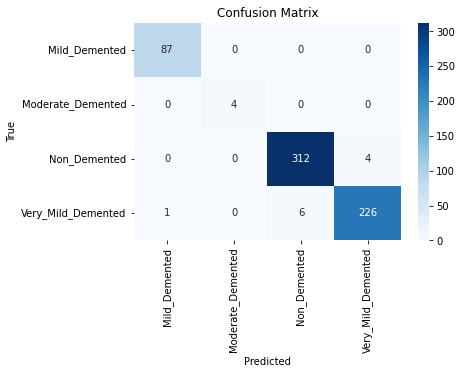

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the validation dataset
y_pred = model.predict(X_valid)

# Get the predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true classes
y_true = np.argmax(y_valid, axis=1) # assuming y_valid is in a multi-class format

# Class names
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
